# Missing Data

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = {'Name':['Ali','Abduallah',np.nan,'Sami',np.nan,'Amal',np.nan,np.nan,'Amjad','Shahed'],
      'Gender':['Male','Male', np.nan,'Male','Male','Female','Female','Female','Female','Female'],
      'Income':[5000, 7000, np.nan, 7000, 3000, np.nan, 7000, 3000, 7000, 1000],
       'Work':[np.nan,'Remote',np.nan,'On_site','Remote','On_site','Remote',np.nan,'On_site','Remote']}

data = pd.DataFrame(data)

In [3]:
data

,Name,Gender,Income,Work
0,Ali,Male,5000.0,NaN
1,Abduallah,Male,7000.0,Remote
2,NaN,NaN,NaN,NaN
3,Sami,Male,7000.0,On_site
4,NaN,Male,3000.0,Remote
5,Amal,Female,NaN,On_site
6,NaN,Female,7000.0,Remote
7,NaN,Female,3000.0,NaN
8,Amjad,Female,7000.0,On_site
9,Shahed,Female,1000.0,Remote


## Identifying the Missing Data

In [4]:
data.isnull() # or .notnull()

,Name,Gender,Income,Work
0,False,False,False,True
1,False,False,False,False
2,True,True,True,True
3,False,False,False,False
4,True,False,False,False
5,False,False,True,False
6,True,False,False,False
7,True,False,False,True
8,False,False,False,False
9,False,False,False,False


In [5]:
data.isnull().sum()

Name      4
Gender    1
Income    2
Work      3
dtype: int64

In [6]:
data.isna().sum()

Name      4
Gender    1
Income    2
Work      3
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    6 non-null      object 
 1   Gender  9 non-null      object 
 2   Income  8 non-null      float64
 3   Work    7 non-null      object 
dtypes: float64(1), object(3)
memory usage: 448.0+ bytes


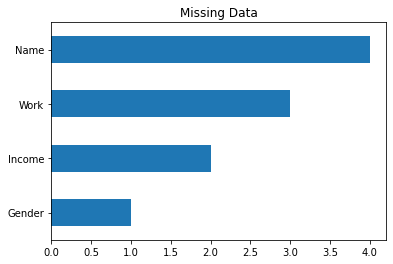

In [8]:
data.isnull().sum().sort_values().plot(kind="barh", title="Missing Data");

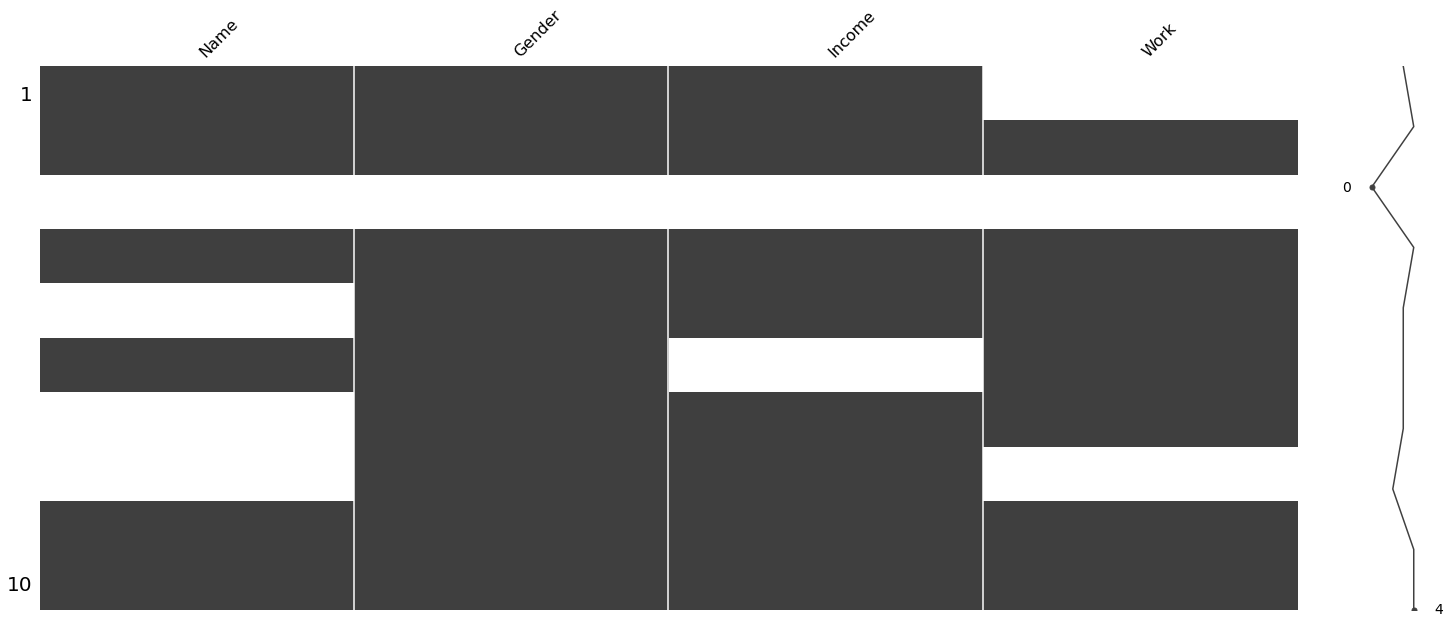

In [9]:
import missingno as msno  # pip install missingno

# Plot correlation heatmap of missingness
msno.matrix(data);

## Handling the Missing Data

### 1- Data Dropping

In [10]:
data

,Name,Gender,Income,Work
0,Ali,Male,5000.0,NaN
1,Abduallah,Male,7000.0,Remote
2,NaN,NaN,NaN,NaN
3,Sami,Male,7000.0,On_site
4,NaN,Male,3000.0,Remote
5,Amal,Female,NaN,On_site
6,NaN,Female,7000.0,Remote
7,NaN,Female,3000.0,NaN
8,Amjad,Female,7000.0,On_site
9,Shahed,Female,1000.0,Remote


In [11]:
d_data = data.dropna()
d_data

,Name,Gender,Income,Work
1,Abduallah,Male,7000.0,Remote
3,Sami,Male,7000.0,On_site
8,Amjad,Female,7000.0,On_site
9,Shahed,Female,1000.0,Remote


In [12]:
d_data = data.dropna(how="all")
d_data

,Name,Gender,Income,Work
0,Ali,Male,5000.0,NaN
1,Abduallah,Male,7000.0,Remote
3,Sami,Male,7000.0,On_site
4,NaN,Male,3000.0,Remote
5,Amal,Female,NaN,On_site
6,NaN,Female,7000.0,Remote
7,NaN,Female,3000.0,NaN
8,Amjad,Female,7000.0,On_site
9,Shahed,Female,1000.0,Remote


In [13]:
d_data = data.dropna(axis=1)
d_data

""
0
1
2
3
4
5
6
7
8
9


### 2- Imputation

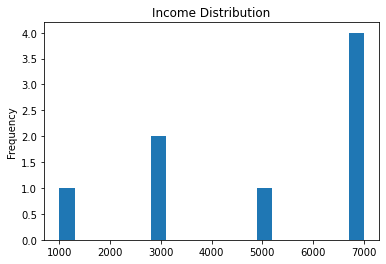

In [14]:
# continuous data
data.Income.plot(kind="hist", bins=20, title="Income Distribution");

In [15]:
data.Income.var()

5714285.714285715

In [16]:
Income_mean = round(data.Income.mean())
print('Avg. Income = ', Income_mean)

Avg. Income =  5000


In [17]:
data.Income.mean()

5000.0

In [18]:
data.Income = data.Income.fillna(Income_mean)
data.Income.isnull().sum()

0

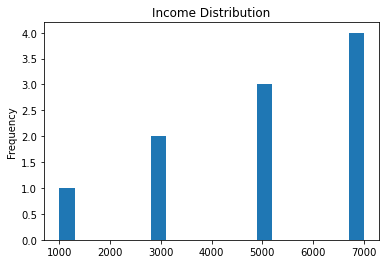

In [19]:
data.Income.plot(kind="hist", bins=20, title="Income Distribution");

In [20]:
data.Income.var()

4444444.444444444

In [21]:
data

,Name,Gender,Income,Work
0,Ali,Male,5000.0,NaN
1,Abduallah,Male,7000.0,Remote
2,NaN,NaN,5000.0,NaN
3,Sami,Male,7000.0,On_site
4,NaN,Male,3000.0,Remote
5,Amal,Female,5000.0,On_site
6,NaN,Female,7000.0,Remote
7,NaN,Female,3000.0,NaN
8,Amjad,Female,7000.0,On_site
9,Shahed,Female,1000.0,Remote


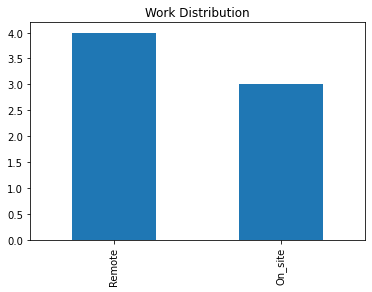

In [22]:
# catagorical data
data['Work'].value_counts().plot(kind='bar', title="Work Distribution");
# mean is not suitable as it would give a value that is not represented in the dataset 

In [23]:
Work_mode = data.Work.mode()[0]
Work_mode

'Remote'

In [24]:
data['Work'] = data['Work'].fillna(Work_mode) # we can use replace(np.NaN, Work_mode)

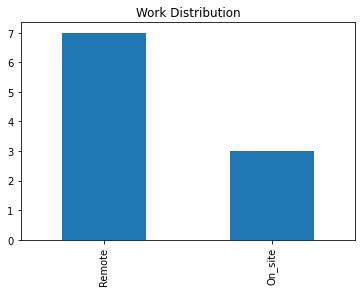

In [25]:
data['Work'].value_counts().plot(kind='bar', title="Work Distribution");

In [26]:
data

,Name,Gender,Income,Work
0,Ali,Male,5000.0,Remote
1,Abduallah,Male,7000.0,Remote
2,NaN,NaN,5000.0,Remote
3,Sami,Male,7000.0,On_site
4,NaN,Male,3000.0,Remote
5,Amal,Female,5000.0,On_site
6,NaN,Female,7000.0,Remote
7,NaN,Female,3000.0,Remote
8,Amjad,Female,7000.0,On_site
9,Shahed,Female,1000.0,Remote


In [27]:
data_v2 = {'Name':['Ali','Abduallah','Sultan','Sami','Khalid','Amal','Maha','Razan','Amjad','Shahed'],
      'Gender':['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
      'Income':[5000, np.nan, 3000, 7000, np.nan, 5000, np.nan, np.nan, 7000, 1000]}

data_v2 = pd.DataFrame(data_v2)
data_v2

,Name,Gender,Income
0,Ali,Male,5000.0
1,Abduallah,Male,NaN
2,Sultan,Male,3000.0
3,Sami,Male,7000.0
4,Khalid,Male,NaN
5,Amal,Female,5000.0
6,Maha,Female,NaN
7,Razan,Female,NaN
8,Amjad,Female,7000.0
9,Shahed,Female,1000.0


In [28]:
female_data = data_v2[data_v2["Gender"] == "Female"]
male_data = data_v2[data_v2["Gender"] == "Male"]
print('Male Avg. Income',male_data.Income.mean())
print('Female Avg. Income', round(female_data.Income.mean()))

Male Avg. Income 5000.0
Female Avg. Income 4333


In [29]:
grades = pd.read_csv('class-grades.csv', error_bad_lines=False) # because we have \r new line character
grades

b'Skipping line 22: expected 6 fields, saw 7\nSkipping line 40: expected 6 fields, saw 7\nSkipping line 62: expected 6 fields, saw 7\n'


,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
91,8,96.73,103.71,45.00,93.52,61.94
92,7,85.34,80.54,41.25,93.70,39.72
93,8,89.94,102.77,87.50,90.74,87.78
94,7,95.60,76.13,66.25,99.81,85.56


In [30]:
grades.isnull().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      1
Final         0
dtype: int64

In [31]:
# add missing data
for col in grades.columns:
    grades.loc[grades.sample(frac=0.1).index, col] = pd.np.nan 

In [32]:
grades.isnull().sum()

Prefix        10
Assignment    10
Tutorial      10
Midterm       10
TakeHome      11
Final         10
dtype: int64

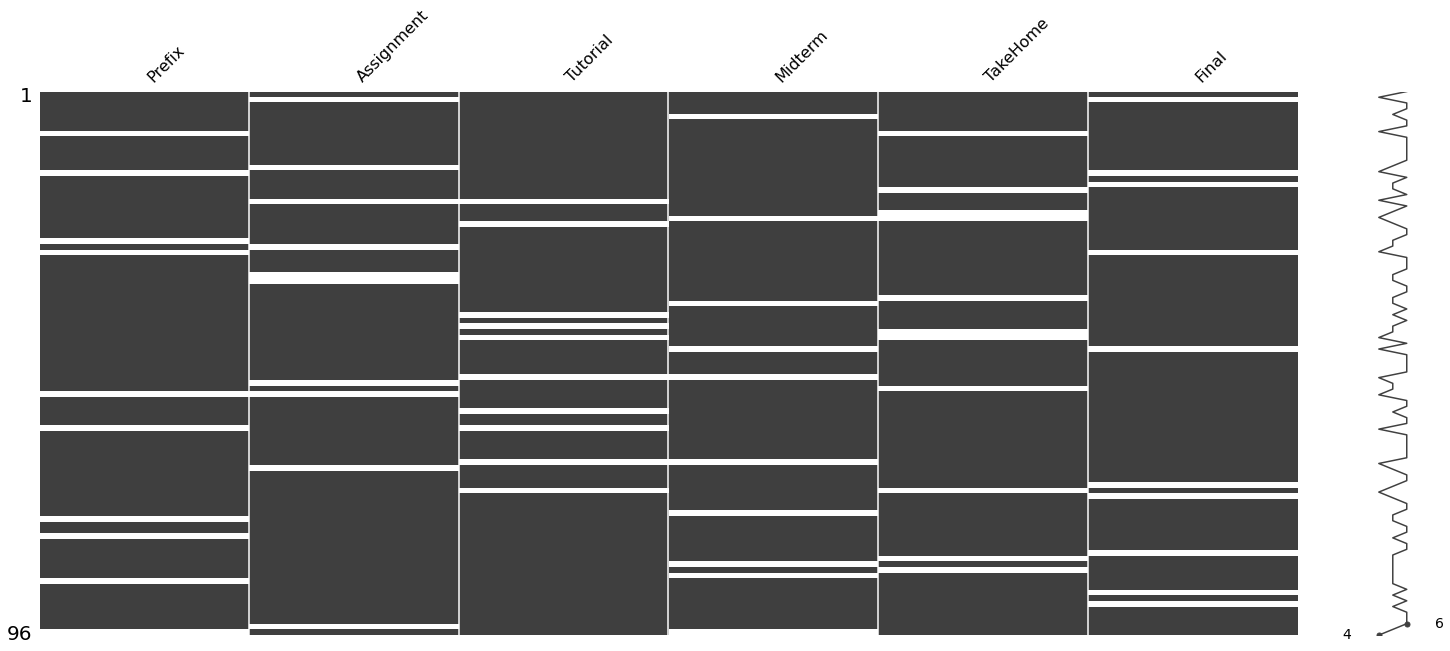

In [33]:
# Plot correlation heatmap of missingness
msno.matrix(grades);

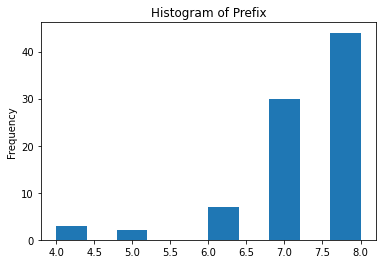

In [34]:
grades['Prefix'].plot(kind="hist", title="Histogram of Prefix");

In [35]:
grades['Prefix'].var()

0.9329685362517114

In [36]:
prefix_mean = round(grades['Prefix'].mean())
prefix_mean

7

In [37]:
grades['Prefix'] = grades['Prefix'].fillna(prefix_mean)
grades['Prefix'].isnull().sum()

0

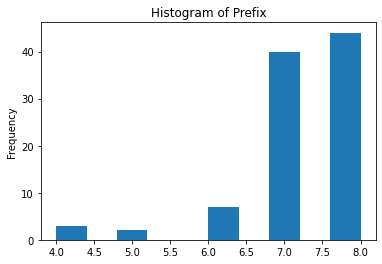

In [38]:
grades['Prefix'].plot(kind="hist", title="Histogram of Prefix");

In [39]:
grades['Prefix'].var()

0.8421052631578947

In [40]:
grades.isnull().sum()

Prefix         0
Assignment    10
Tutorial      10
Midterm       10
TakeHome      11
Final         10
dtype: int64

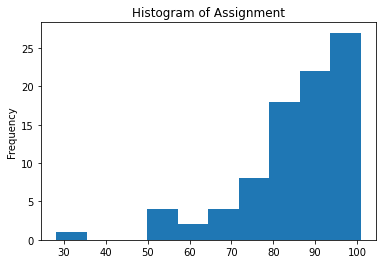

In [41]:
grades['Assignment'].plot(kind="hist", title="Histogram of Assignment");

In [42]:
grades['Assignment'].var()

164.39563157318744

In [43]:
assignment_median = round(grades['Assignment'].median())
assignment_median

89

In [44]:
grades['Assignment'] = grades['Assignment'].fillna(assignment_median)
grades['Assignment'].isnull().sum()

0

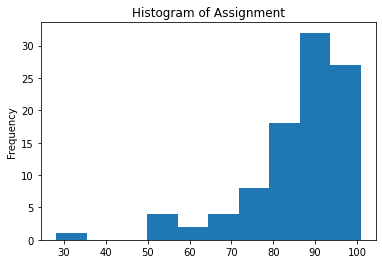

In [45]:
grades['Assignment'].plot(kind="hist",title="Histogram of Assignment");

In [46]:
grades['Assignment'].var()

148.37561192982454

In [47]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial      10
Midterm       10
TakeHome      11
Final         10
dtype: int64

In [48]:
# Forward Filling  >> use the previous value
grades['Tutorial'][0:30]

0      34.09
1     105.49
2      83.17
3      96.06
4      93.64
5      92.58
6     102.99
7      86.85
8      93.10
9      97.55
10     90.20
11     80.60
12    103.71
13     83.53
14     89.08
15     95.43
16     89.08
17    102.52
18     81.85
19       NaN
20     97.52
21     76.21
22     90.20
23       NaN
24     95.24
25     86.65
26     86.67
27     94.89
28     65.18
29    102.46
Name: Tutorial, dtype: float64

In [49]:
grades['Tutorial'] = grades['Tutorial'].fillna(method="ffill")

In [50]:
grades['Tutorial'][0:30]

0      34.09
1     105.49
2      83.17
3      96.06
4      93.64
5      92.58
6     102.99
7      86.85
8      93.10
9      97.55
10     90.20
11     80.60
12    103.71
13     83.53
14     89.08
15     95.43
16     89.08
17    102.52
18     81.85
19     81.85
20     97.52
21     76.21
22     90.20
23     90.20
24     95.24
25     86.65
26     86.67
27     94.89
28     65.18
29    102.46
Name: Tutorial, dtype: float64

In [51]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial       0
Midterm       10
TakeHome      11
Final         10
dtype: int64

In [52]:
# Backward Filling >> use the next value
grades['TakeHome'][0:10]

0     51.48
1     99.07
2     63.15
3    105.93
4    107.41
5     97.78
6     99.07
7       NaN
8     18.52
9     88.89
Name: TakeHome, dtype: float64

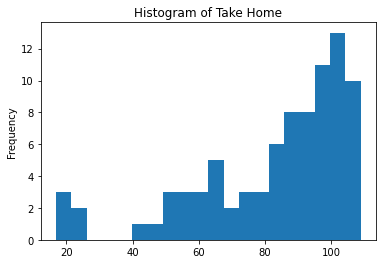

In [53]:
grades['TakeHome'].plot(kind="hist", bins=20, title="Histogram of Take Home");

In [54]:
grades['TakeHome'].fillna(method="bfill", inplace =True)

In [55]:
grades['TakeHome'][0:10]

0     51.48
1     99.07
2     63.15
3    105.93
4    107.41
5     97.78
6     99.07
7     18.52
8     18.52
9     88.89
Name: TakeHome, dtype: float64

In [56]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial       0
Midterm       10
TakeHome       0
Final         10
dtype: int64

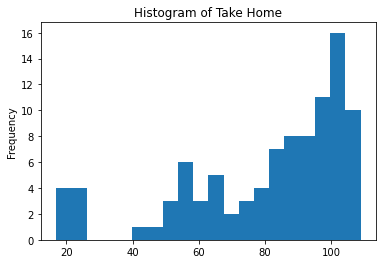

In [57]:
grades['TakeHome'].plot(kind="hist", bins=20, title="Histogram of Take Home");

In [58]:
grades.isnull().sum()

Prefix         0
Assignment     0
Tutorial       0
Midterm       10
TakeHome       0
Final         10
dtype: int64

In [59]:
# Random Sample Imputation
def random_sample_imputation(df):
    cols_with_missing_values = df.columns[df.isna().any()].tolist()
    
    for var in cols_with_missing_values:
        # extract a random sample
        random_sample_df = df[var].dropna().sample(df[var].isnull().sum(), random_state=0)
        # re-index the randomly extracted sample
        random_sample_df.index = df[df[var].isnull()].index

        # replace the NA
        df.loc[df[var].isnull(), var] = random_sample_df
    return df

In [60]:
random_sample_imputation(grades)
grades.isnull().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      0
Final         0
dtype: int64

# Resources:
- https://chen5595.cems.umn.edu/SameStats-DifferentGraphs.pdf
- https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html
- Wes McKinney, 2018, Python for Data Analysis, 2ed edition, O’Reilly Media, US.
- https://www.idrc.ca/sites/default/files/sp/Documents%20EN/10-data-visualization-tips-en.pdf